In [2]:
import os
import pandas as pd
from pandas_gbq import read_gbq
from google.cloud import bigquery

# Set up BigQuery client
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "../keyfile.json"
client = bigquery.Client()

query = f"""
SELECT *
FROM `chesscom-451104.datamart.agg_games`
"""

games = read_gbq(query, project_id='chesscom-451104', dialect='standard')

Downloading: 100%|██████████|


In [3]:
games = games[games['playing_result'].isin(['Win', 'Lose'])]

piwi100
Accuracy: 0.8243243243243243


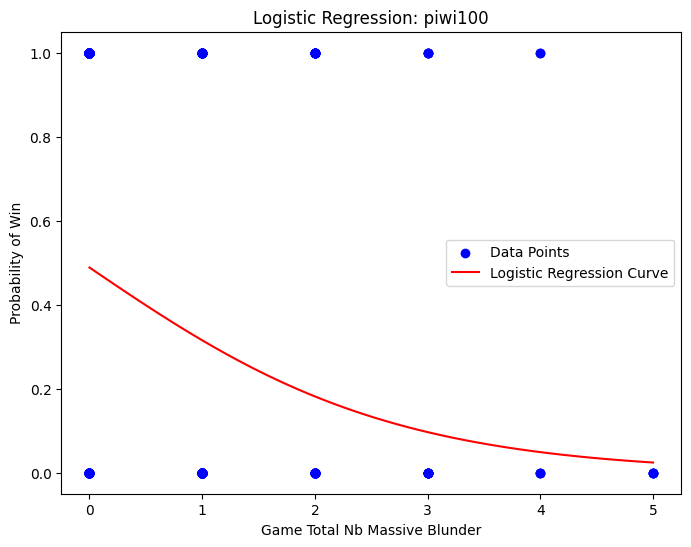

quentinusdesbois
Accuracy: 0.6857142857142857


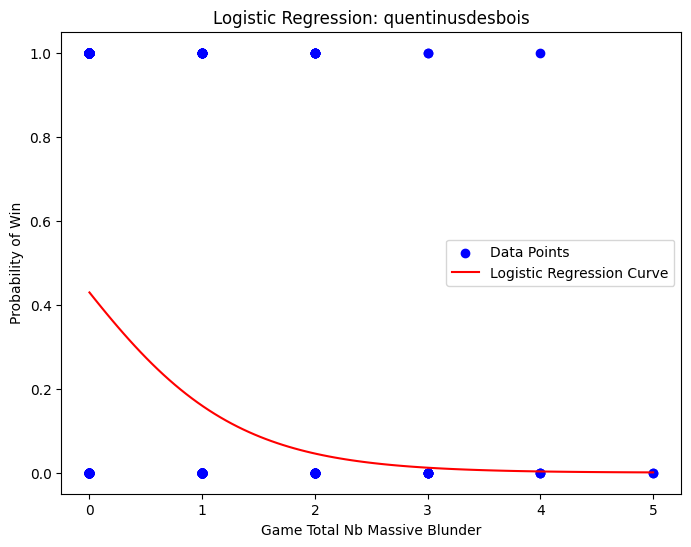

leprechess
Accuracy: 0.568904593639576


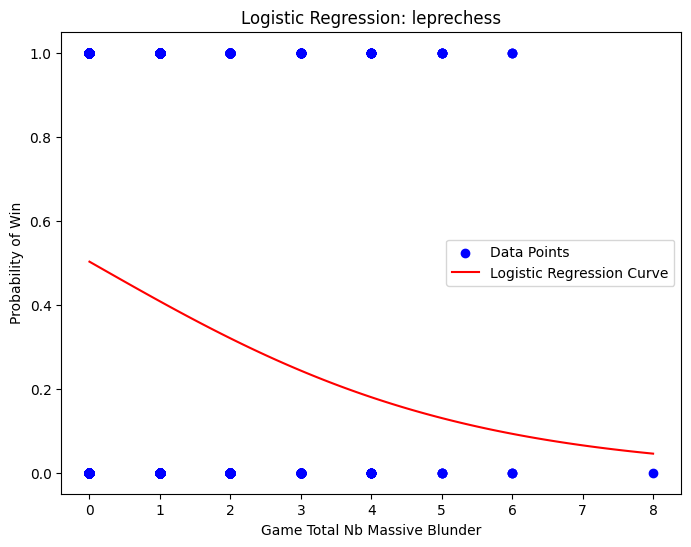

bgdu33
Accuracy: 0.782051282051282


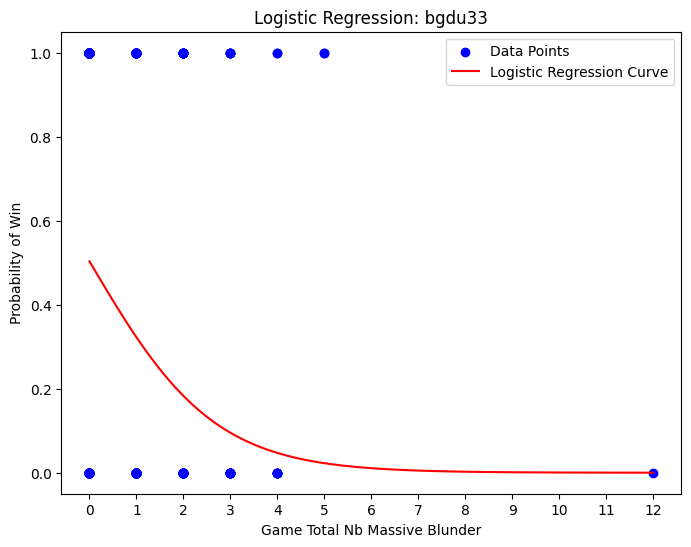

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

def train_logistic_regression(username: str, games_df: pd.DataFrame) -> None:
    # Filter the dataframe for the given username
    user_games = games_df[games_df['username'] == username].copy()  # Make a copy to avoid SettingWithCopyWarning
    
    # Check if there are no data points for the username
    if user_games.empty:
        print(f"No data found for username: {username}")
        return

    # Convert 'playing_result' to binary (Win = 1, Lose = 0)
    user_games.loc[:, 'playing_result_binary'] = user_games['playing_result'].map({'Win': 1, 'Lose': 0})

    # Selecting only one feature: 'game_total_nb_throw'
    X = user_games[['game_total_nb_throw']]
    y = user_games['playing_result_binary']

    # 3. Normalizing the feature (Standardization)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)  # This scales both the training and test sets

    # 4. Splitting the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # 5. Building and training the logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # 6. Predicting on the test set
    y_pred = model.predict(X_test)

    # 7. Evaluating the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Printing the accuracy and confusion matrix
    print(username)
    print(f"Accuracy: {accuracy}")

    # Create a new figure for each plot to avoid mixing
    plt.figure(figsize=(8, 6))

    # Plotting the data
    plt.scatter(X, y, color='blue', label='Data Points')

    # Generating values for plotting the logistic curve
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_prob = model.predict_proba(X_range)[:, 1]  # Get the probabilities for the positive class

    # Plot the logistic curve
    plt.plot(X_range, y_prob, color='red', label='Logistic Regression Curve')

    # Labels and title
    plt.xlabel('Game Total Nb Massive Blunder')
    plt.ylabel('Probability of Win')
    plt.title(f'Logistic Regression: {username}')
    plt.legend()

    # Set x-axis to integer ticks
    x_min = int(X.min().iloc[0])
    x_max = int(X.max().iloc[0])
    plt.xticks(np.arange(x_min, x_max + 1, 1))

    # Show the plot
    plt.show()

# Example usage
train_logistic_regression('piwi100', games)
train_logistic_regression('quentinusdesbois', games)
train_logistic_regression('leprechess', games)
train_logistic_regression('bgdu33', games)
